In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_curve, auc, 
                             classification_report, roc_auc_score)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop_recommendation with tomato - Crop_recommendation.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2250 entries, 90.0 to 3.40058
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P            2250 non-null   float64
 1   K            2250 non-null   float64
 2   temperature  2250 non-null   float64
 3   humidity     2250 non-null   float64
 4   ph           2250 non-null   float64
 5   rainfall     2250 non-null   float64
 6   label        2250 non-null   object 
dtypes: float64(6), object(1)
memory usage: 140.6+ KB


In [4]:
df.head()

,P,K,temperature,humidity,ph,rainfall,label
N,,,,,,,
90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P,2250.0,52.185674,33.539016,0.301200,26.000000,50.000000,68.000000,145.000000
K,2250.0,47.124720,50.540834,1.515840,20.000000,31.000000,48.000000,205.000000
temperature,2250.0,25.582363,5.034550,8.825675,22.728511,25.566354,28.523924,43.675493
humidity,2250.0,71.245109,22.086103,14.258040,59.991356,80.234359,89.766257,99.981876
ph,2250.0,6.462393,0.769309,3.504752,5.961951,6.418403,6.913334,9.935091
rainfall,2250.0,122.080767,137.679339,20.211267,65.144770,96.375155,133.171587,1199.967000


In [6]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
def plot_box(df):
    numerical_cols = list(df.select_dtypes(include='number').columns)
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(20,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='label',y=column,data=df,palette='rocket', linewidth=2.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

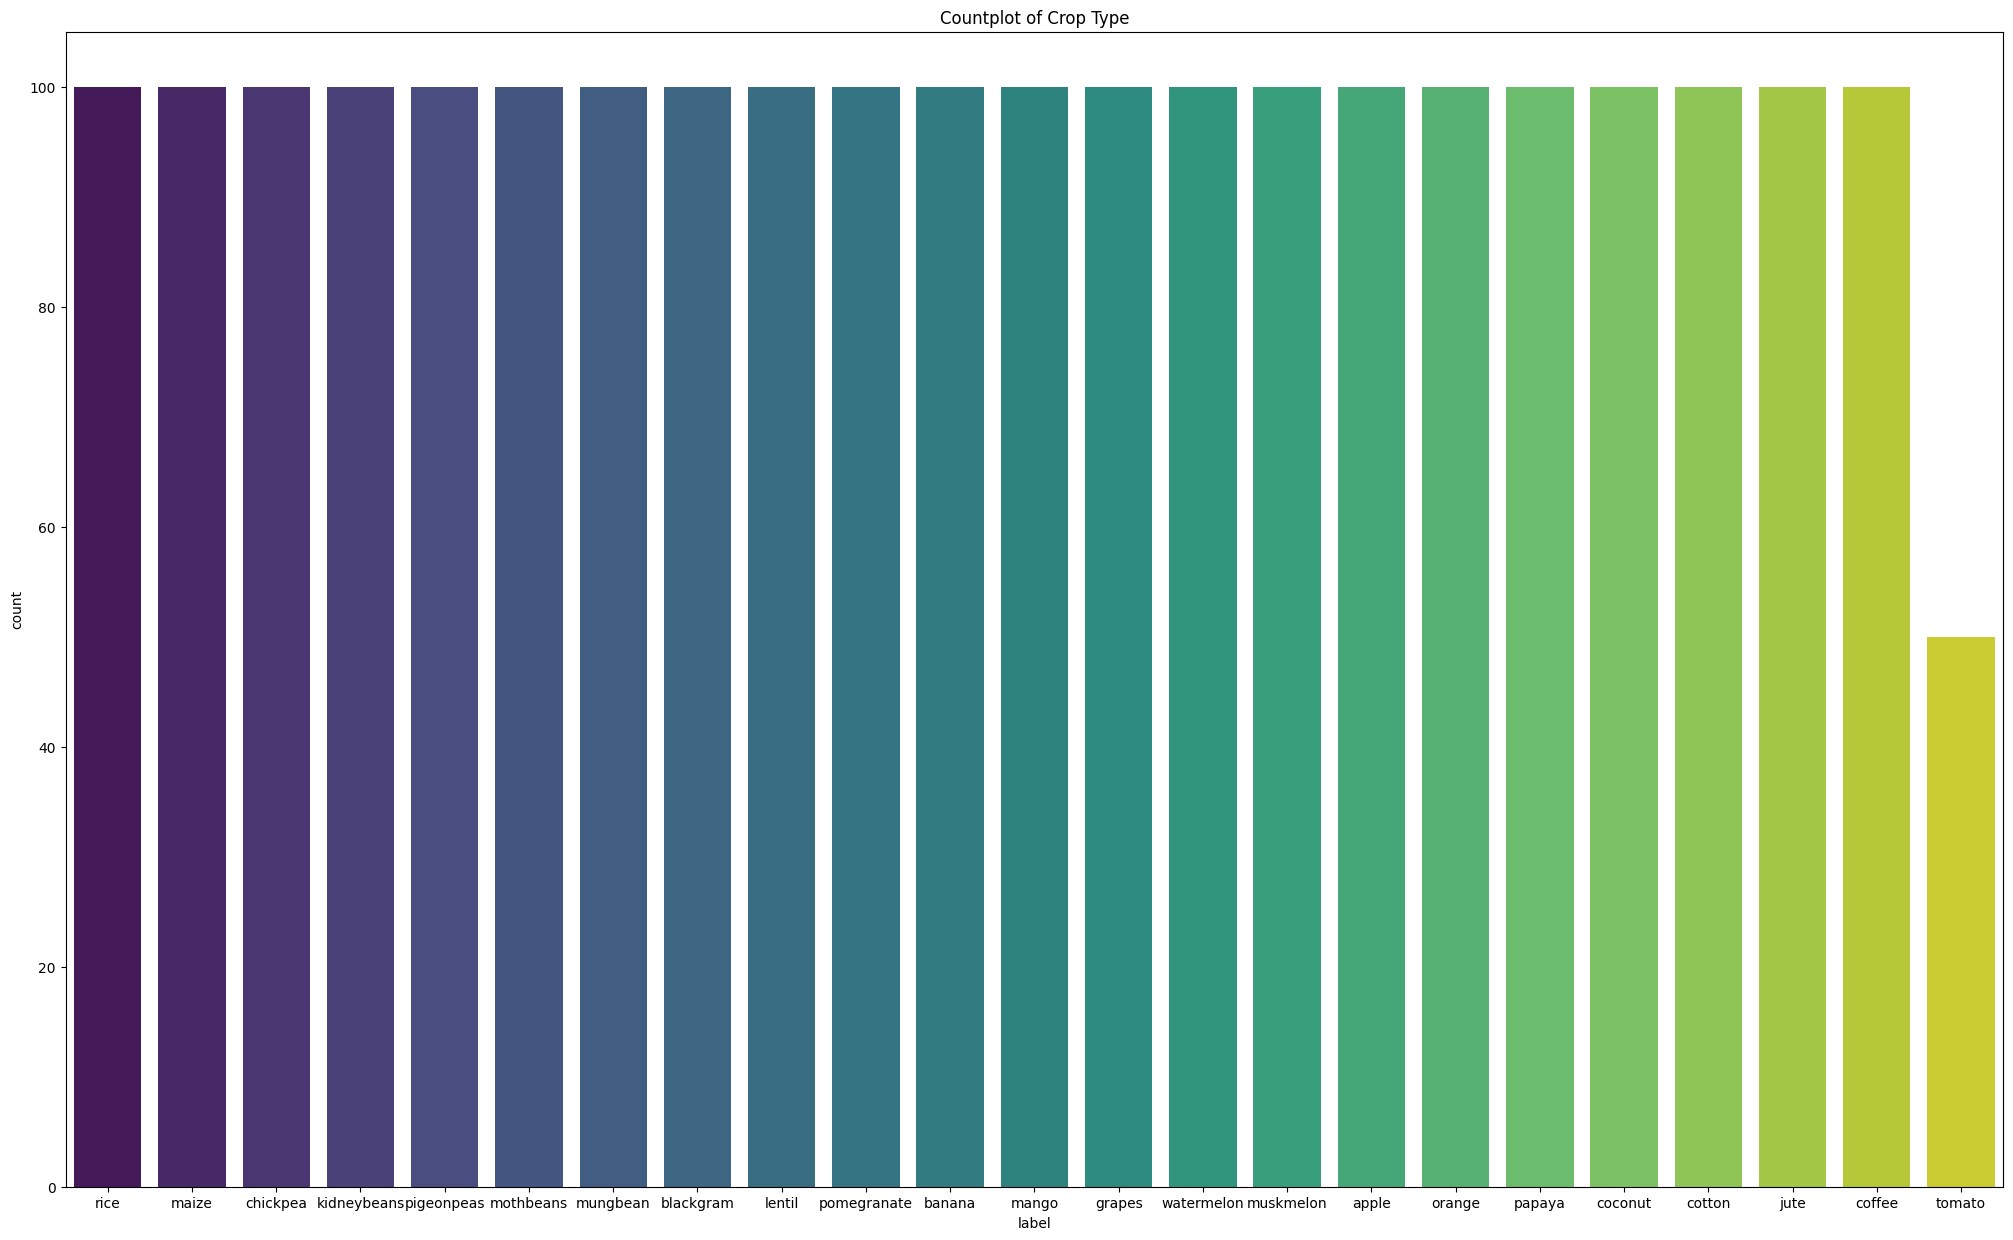

In [19]:
plt.figure(figsize=(25,15))
sns.countplot(x='label',data=df,palette='viridis')
plt.title('Countplot of Crop Type')
plt.show()

In [25]:
def plot_hist(df):
    numerical_cols = list(df.select_dtypes(include='number').columns)
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(15,15),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='winter',ax=ax,kde=True,bins=70)        
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

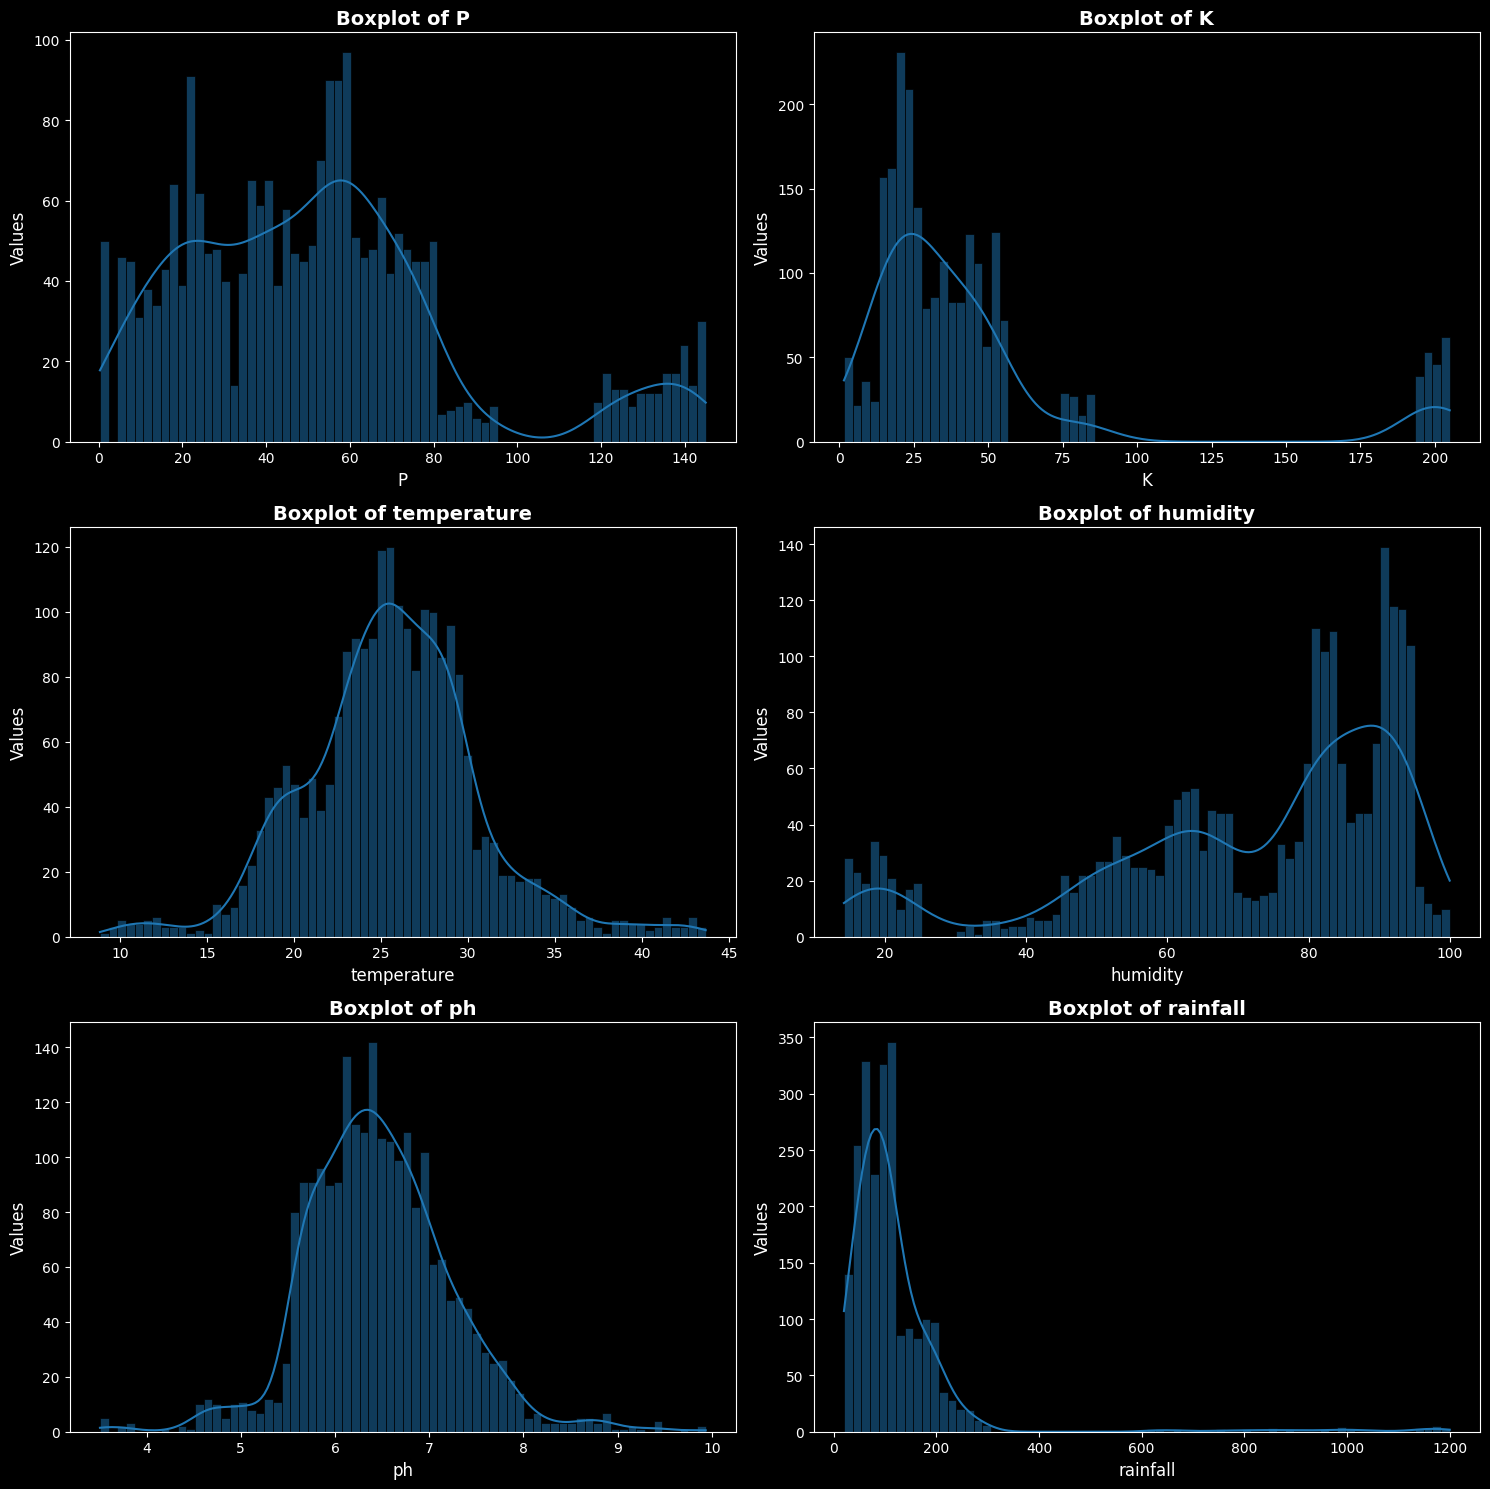

In [26]:
plot_hist(df)

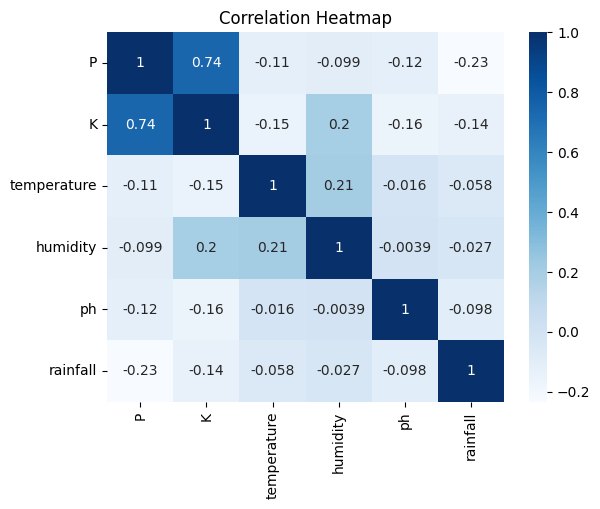

In [29]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop('label',axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)   

In [35]:
from sklearn.preprocessing import StandardScaler
std_sclr = StandardScaler()
X_train = std_sclr.fit_transform(X_train)
X_test = std_sclr.transform(X_test)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
print(classification_report(pred_dtree,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      0.94      0.97        32
   blackgram       1.00      0.97      0.98        31
    chickpea       1.00      1.00      1.00        30
     coconut       0.97      1.00      0.98        29
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        29
      grapes       1.00      1.00      1.00        30
        jute       0.87      0.96      0.91        27
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.90      0.90      0.90        30
       maize       0.90      0.90      0.90        30
       mango       0.97      1.00      0.98        29
   mothbeans       0.90      0.84      0.87        32
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      0.97      0.98        31
      papaya       0.93    

### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
#custom paramters
rfc_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'random_state': None,
 'verbose': 0}
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(pred_rfc,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.94      0.97        32
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.97      1.00      0.98        29
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        30
   mothbeans       1.00      0.97      0.98        31
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        30
      papaya       1.00    

### LGBM

In [45]:
from lightgbm import LGBMClassifier
params = {
    'learning_rate': 0.001,
    'boosting_type': 'gbdt',
    'objective': 'multiclass',      # Changed objective to multiclass
    'metric': 'multi_logloss',      # Changed metric to multi_logloss
    'sub_feature': 0.8,             # colsample_bytree
    'num_leaves': 45,
    'min_child_samples': 25,        # min_data_in_leaf
    'n_estimators': 50,
    'max_depth': 20,
    'num_class': 23     # Specify the number of classes in your dataset
}
lgbm = LGBMClassifier(**params)
lgbm.fit(X_train,y_train)
pred_lgbm = lgbm.predict(X_test)
print(classification_report(pred_lgbm,y_test))

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 1575, number of used features: 6
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from sco

### ANN

### encode label

In [51]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
y_train = lbl_en.fit_transform(y_train)
y_test = lbl_en.transform(y_test)

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class ANN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  # Output layer with num_classes neurons
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)  # No activation (CrossEntropyLoss expects raw logits)
        return x

In [70]:
def train_and_evaluate_ann(X_train, y_train, X_test, y_test, epochs=300, lr=0.001):
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

    # Encode labels
    lbl_en = LabelEncoder()
    y_train = lbl_en.fit_transform(y_train)
    y_test = lbl_en.transform(y_test)

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device) 
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device) 

    # Define ANN model
    model = ANN(X_train.shape[1], len(lbl_en.classes_)).to(device)
    criterion = nn.CrossEntropyLoss() 
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)  # No sigmoid activation (handled in loss function)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_test_tensor).cpu()
        y_pred = torch.argmax(y_pred_probs, dim=1).numpy()  # Get predicted class index

    # Decode labels back
    y_pred = lbl_en.inverse_transform(y_pred)
    y_test = lbl_en.inverse_transform(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")

    return model


In [71]:
train_and_evaluate_ann(X_train,y_train,X_test,y_test)

Epoch [10/300], Loss: 2.9754
Epoch [20/300], Loss: 2.7278
Epoch [30/300], Loss: 2.4226
Epoch [40/300], Loss: 2.1013
Epoch [50/300], Loss: 1.7821
Epoch [60/300], Loss: 1.4781
Epoch [70/300], Loss: 1.2072
Epoch [80/300], Loss: 0.9764
Epoch [90/300], Loss: 0.7890
Epoch [100/300], Loss: 0.6423
Epoch [110/300], Loss: 0.5297
Epoch [120/300], Loss: 0.4436
Epoch [130/300], Loss: 0.3772
Epoch [140/300], Loss: 0.3256
Epoch [150/300], Loss: 0.2847
Epoch [160/300], Loss: 0.2517
Epoch [170/300], Loss: 0.2247
Epoch [180/300], Loss: 0.2023
Epoch [190/300], Loss: 0.1833
Epoch [200/300], Loss: 0.1671
Epoch [210/300], Loss: 0.1531
Epoch [220/300], Loss: 0.1410
Epoch [230/300], Loss: 0.1303
Epoch [240/300], Loss: 0.1209
Epoch [250/300], Loss: 0.1126
Epoch [260/300], Loss: 0.1050
Epoch [270/300], Loss: 0.0983
Epoch [280/300], Loss: 0.0921
Epoch [290/300], Loss: 0.0866
Epoch [300/300], Loss: 0.0815
Test Accuracy: 0.9733


ANN(
  (fc1): Linear(in_features=6, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=23, bias=True)
)

### XGBoost

In [60]:
from xgboost import XGBClassifier
#custom paramters
params_xgb = {
    "tree_method": "auto",
    "n_estimators": 1000,
    "learning_rate": 0.05,
    "max_depth": 7,
    "min_child_weight": 1,
    "subsample": 1.0,
    "colsample_bytree": 1.0,
    "gamma": 2,
    "reg_lambda": 1,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 0,
}
xg_cl = XGBClassifier(**params_xgb, enable_categorical=True)
xg_cl.fit(X_train,y_train)
pred_xg = xg_cl.predict(X_test)
print(classification_report(lbl_en.inverse_transform(pred_xg),lbl_en.inverse_transform(y_test)))

              precision    recall  f1-score   support

       apple       1.00      0.97      0.98        31
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        31
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        29
      grapes       0.97      1.00      0.98        29
        jute       1.00      1.00      1.00        30
 kidneybeans       1.00      0.97      0.98        31
      lentil       0.90      0.96      0.93        28
       maize       0.97      0.91      0.94        32
       mango       1.00      1.00      1.00        30
   mothbeans       1.00      0.97      0.98        31
    mungbean       1.00      0.94      0.97        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        30
      papaya       0.97    

### 99% accuracy achieved by XGboost